In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv("heart_data.csv", index_col = False)

In [3]:
heart.head()

,age,sex,chest_pain,resting_bp,cholesterol,high_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,ST_slope,major_vessels,thalassemia,heart_disease
0,70.0,Male,Asymptomatic,130.0,322.0,False,LV_Growth,109.0,False,2.4,Flat,3.0,Fixed_Defect,Present
1,67.0,Female,Non_Anginal,115.0,564.0,False,LV_Growth,160.0,False,1.6,Flat,0.0,Reversable_Defect,Absent
2,57.0,Male,Atypical,124.0,261.0,False,Normal,141.0,False,0.3,Downsloping,0.0,Reversable_Defect,Present
3,64.0,Male,Asymptomatic,128.0,263.0,False,Normal,105.0,True,0.2,Flat,1.0,Reversable_Defect,Absent
4,74.0,Female,Atypical,120.0,269.0,False,LV_Growth,121.0,True,0.2,Downsloping,1.0,Fixed_Defect,Absent


In [7]:
sns.set_style("whitegrid")

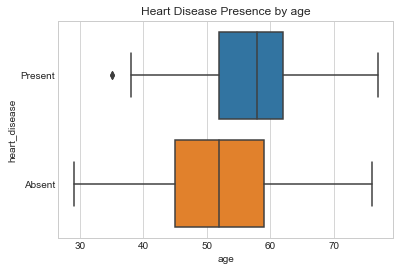

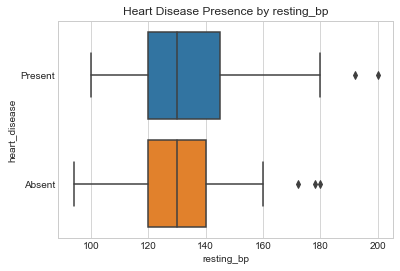

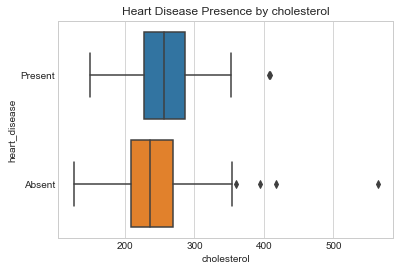

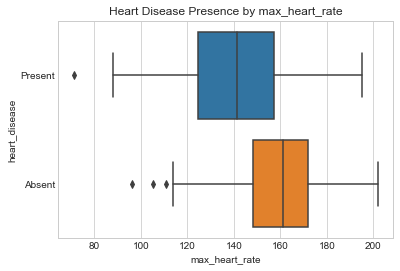

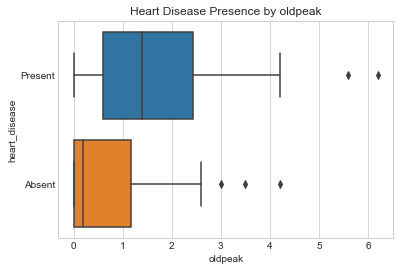

In [17]:
numeric_cols = ["age", "resting_bp", "cholesterol", "max_heart_rate", "oldpeak"]

for i in range(len(numeric_cols)):
    ax = sns.boxplot(x=numeric_cols[i], y="heart_disease", data=heart)
    plot_title = str("Heart Disease Presence by " + numeric_cols[i])
    ax.set(title = plot_title)
    plt.show(ax)
    print(" ")

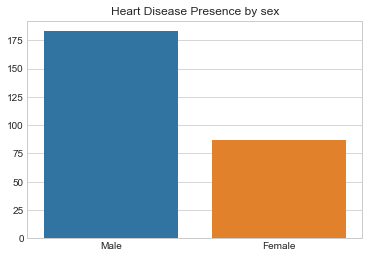

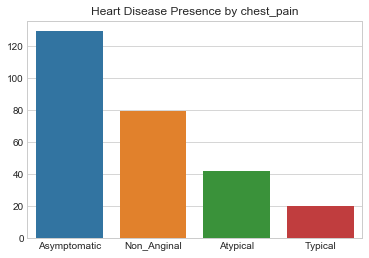

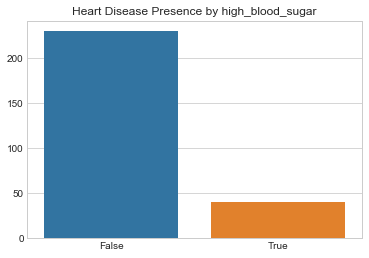

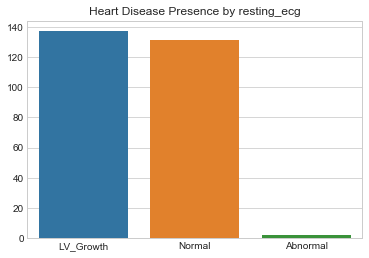

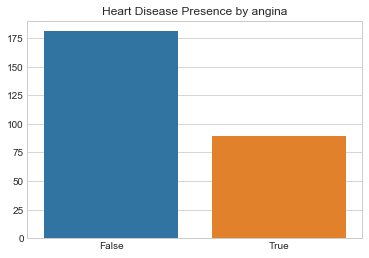

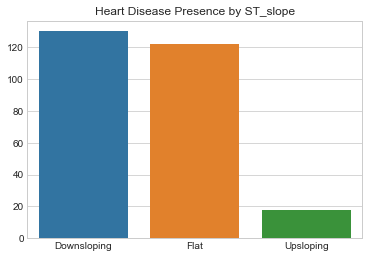

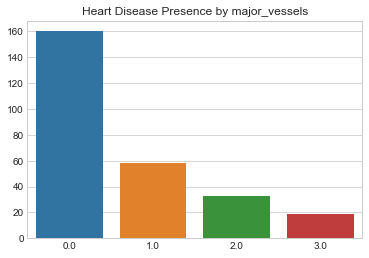

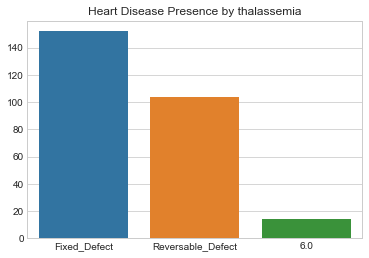

In [9]:
#need to divide these by disease and non-disease

categorical_cols = ["sex", "chest_pain", "high_blood_sugar", "resting_ecg", "angina", "ST_slope",
                   "major_vessels", "thalassemia"]

for i in range(len(categorical_cols)):
    values = heart[categorical_cols[i]].value_counts().keys().tolist()
    counts = heart[categorical_cols[i]].value_counts().tolist()
    ax = sns.barplot(x= values, y=counts)
    plot_title = str("Heart Disease Presence by " + categorical_cols[i])
    ax.set(title = plot_title)
    plt.show(ax)
    print(" ")

In [10]:
categorical_cols = ["sex", "chest_pain", "high_blood_sugar", "resting_ecg", "angina", "ST_slope",
                   "major_vessels", "thalassemia"]
values = heart[categorical_cols[i]].value_counts().keys().tolist()
counts = heart[categorical_cols[i]].value_counts().tolist()


In [7]:
#multivariate graphs (All should be with target feature as well)
# Age and cholesterol 
# Age and Blood Pressure
# Sex and Cholesterol
# Sex and Blood Pressure
# Age and Max Heart Rate
# High Blood Sugar and Cholesterol
# High Blood Sugar and Max Heart Rate
# Cholesterol and Blood Pressure
# 
#


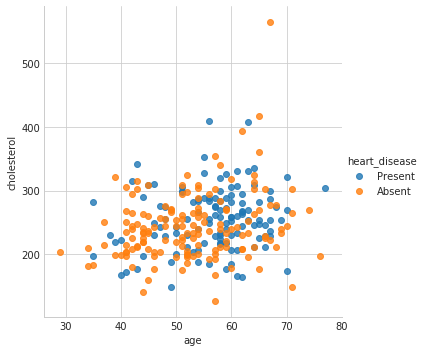

In [29]:
g = sns.lmplot(x="age", y="cholesterol", hue="heart_disease",
               truncate=True, size=5, fit_reg = False, data=heart)
plt.show()

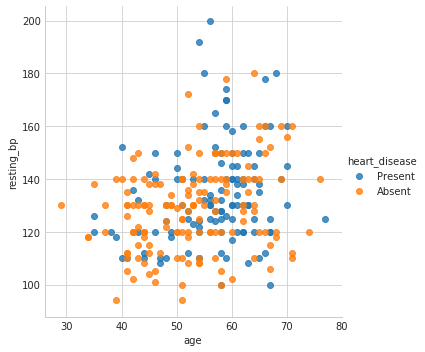

In [32]:
g = sns.lmplot(x="age", y="resting_bp", hue="heart_disease",
               truncate=True, size=5, fit_reg = False, data=heart)
plt.show()

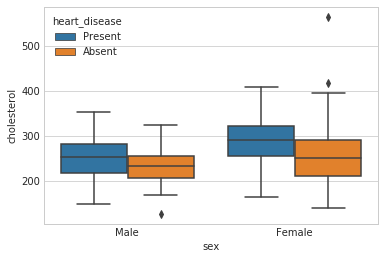

In [20]:
g = sns.boxplot(x="sex", y="cholesterol", hue="heart_disease",
                 data=heart)
plt.show()

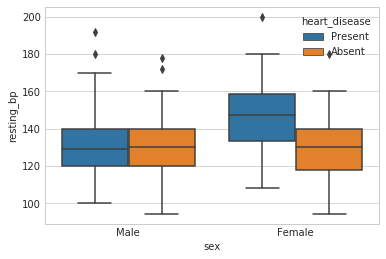

In [21]:
g = sns.boxplot(x="sex", y="resting_bp", hue="heart_disease",
                 data=heart)
plt.show()

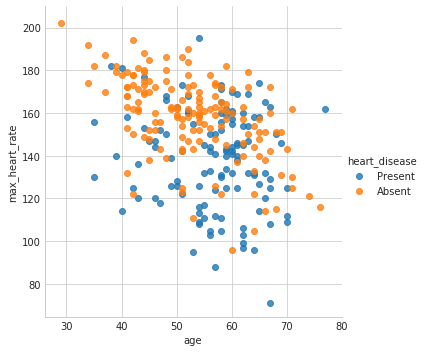

In [31]:
g = sns.lmplot(x="age", y="max_heart_rate", hue="heart_disease",
               truncate=True, size=5, fit_reg = False, data=heart)
plt.show()

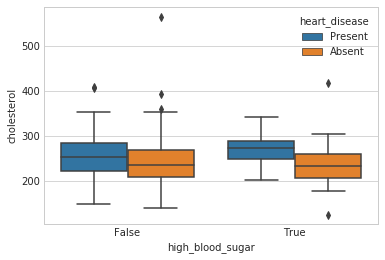

In [23]:
g = sns.boxplot(x="high_blood_sugar", y="cholesterol", hue="heart_disease",
                 data=heart)
plt.show()

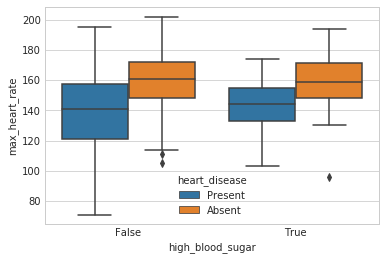

In [24]:
g = sns.boxplot(x="high_blood_sugar", y="max_heart_rate", hue="heart_disease",
                 data=heart)
plt.show()

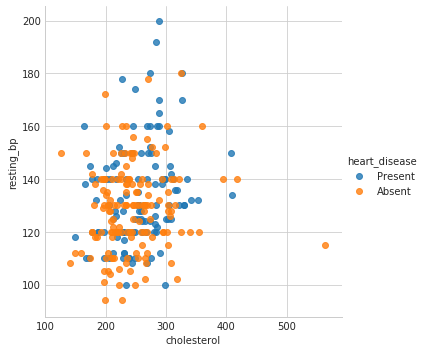

In [30]:
g = sns.lmplot(x="cholesterol", y="resting_bp", hue="heart_disease",
                 data=heart, fit_reg = False)
plt.show()

Text(0.5,1,u'Proportions')

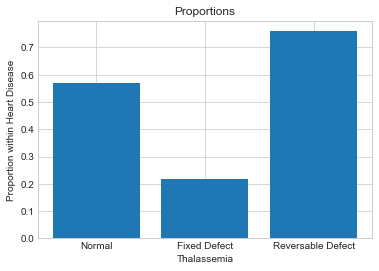

In [36]:
thal_counts = heart['thalassemia'].value_counts()

mask_normal=heart['thalassemia']=="Normal"
mask_fixed=heart['thalassemia']=="Fixed_Defect"
mask_rev=heart['thalassemia']=="Reversable_Defect"

norm_heart=heart.loc[mask_normal,"heart_disease"].value_counts()
fix_heart=heart.loc[mask_fixed,"heart_disease"].value_counts()
rev_heart=heart.loc[mask_rev,"heart_disease"].value_counts()

rate = [norm_heart["Present"]/float(thal_counts['Normal']),fix_heart["Present"]/float(thal_counts['Fixed_Defect']),rev_heart["Present"]/float(thal_counts['Reversable_Defect'])]

plt.bar(range(3),rate,align='center')
plt.xticks(range(3), ['Normal','Fixed Defect','Reversable Defect'])
plt.xlabel('Thalassemia')
plt.ylabel('Proportion')
plt.title('Proportion within Heart Disease Present')

Text(0.5,1,u'Proportion within Heart Disease Present')

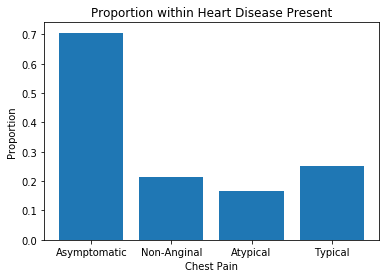

In [6]:
chest_counts = heart['chest_pain'].value_counts()

mask_aysmp=heart['chest_pain']=="Asymptomatic"
mask_nonang=heart['chest_pain']=="Non_Anginal"
mask_atyp=heart['chest_pain']=="Atypical"
mask_typ=heart['chest_pain']=="Typical"

asymp_heart=heart.loc[mask_aysmp,"heart_disease"].value_counts()
nonang_heart=heart.loc[mask_nonang,"heart_disease"].value_counts()
atyp_heart=heart.loc[mask_atyp,"heart_disease"].value_counts()
typ_heart=heart.loc[mask_typ,"heart_disease"].value_counts()

rate = [asymp_heart["Present"]/float(chest_counts['Asymptomatic']),
        nonang_heart["Present"]/float(chest_counts['Non_Anginal']),
        atyp_heart["Present"]/float(chest_counts['Atypical']),
       typ_heart["Present"]/float(chest_counts['Typical'])]

plt.bar(range(4),rate,align='center')
plt.xticks(range(4), ['Asymptomatic','Non-Anginal','Atypical','Typical'])
plt.xlabel('Chest Pain')
plt.ylabel('Proportion')
plt.title('Proportion within Heart Disease Present')